In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import warnings # To suppress some warnings
 
# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

import seaborn as sns
sns.set_style("whitegrid")

/kaggle/input/depression-professional-dataset/Depression Professional Dataset.csv


# Depression Professional Dataset

Entriea: `2,054`

* `Numerical`: 5 columns (Age, Work Pressure, Job Satisfaction, Work Hours, Financial Stress).* `Categorical`: 6 columns (Gender, Sleep Duration, Dietary Habits, Suicidal Thoughts, Family History, Depression).

In [2]:
data = pd.read_csv("/kaggle/input/depression-professional-dataset/Depression Professional Dataset.csv")
data.dropna(inplace=True)

# Renaming columns

Some columns names are way too long to be intuitive in a coding environment. Hence, we are going to rename them.

In [3]:
data = data.rename(columns={
    "Gender": "gender",
    "Age": "age",
    "Work Pressure": "work_pressure",
    "Job Satisfaction": "job_satisfaction",
    "Sleep Duration": "sleep_duration",
    "Dietary Habits": "dietary_habits",
    "Have you ever had suicidal thoughts ?": "had_sucidial_thoughts",
    "Work Hours": "work_hours",
    "Financial Stress": "financial_stress",
    "Family History of Mental Illness": "faml_hist_mental",
    "Depression": "depression",
})

data

,gender,age,work_pressure,job_satisfaction,sleep_duration,dietary_habits,had_sucidial_thoughts,work_hours,financial_stress,faml_hist_mental,depression
0,Female,37,2.0,4.0,7-8 hours,Moderate,No,6,2,No,No
1,Male,60,4.0,3.0,5-6 hours,Unhealthy,Yes,0,4,Yes,No
2,Female,42,2.0,3.0,5-6 hours,Moderate,No,0,2,No,No
3,Female,44,3.0,5.0,7-8 hours,Healthy,Yes,1,2,Yes,No
4,Male,48,4.0,3.0,7-8 hours,Moderate,Yes,6,5,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
2049,Female,45,1.0,3.0,Less than 5 hours,Healthy,Yes,2,5,Yes,No
2050,Male,25,1.0,5.0,5-6 hours,Healthy,Yes,12,3,Yes,No
2051,Female,23,3.0,1.0,Less than 5 hours,Moderate,Yes,8,3,No,Yes
2052,Female,24,1.0,4.0,Less than 5 hours,Moderate,Yes,4,4,No,No


# Data Visualization

In [4]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Depression over age')

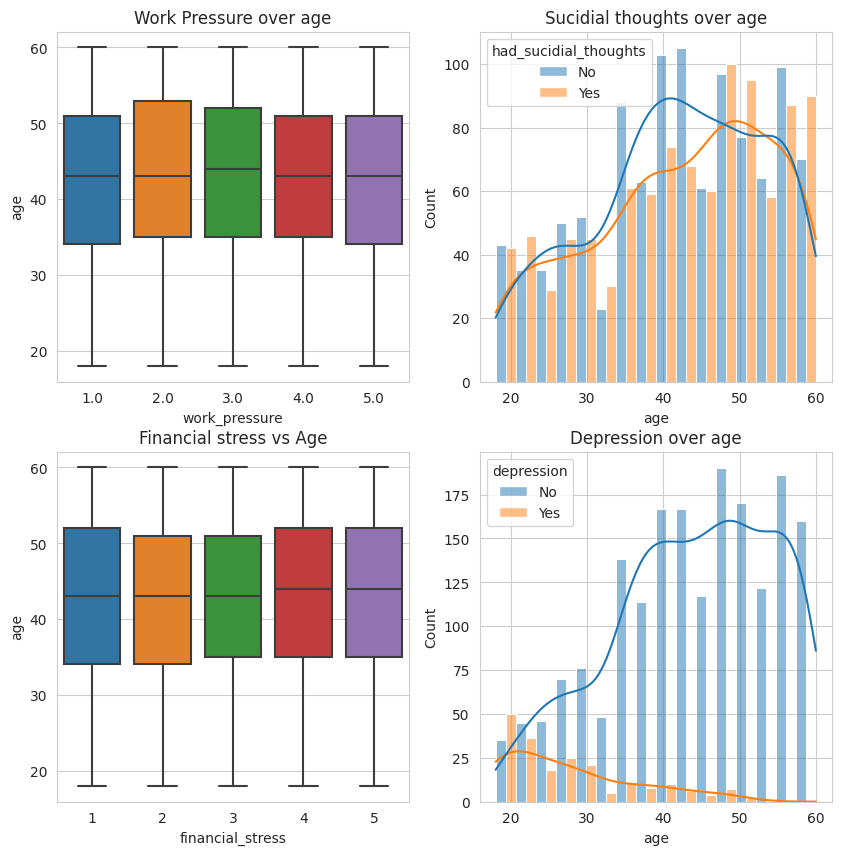

In [5]:
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2,2, figsize=(10,10))

# Work pressure relationship with age
sns.boxplot(data, y="age", x="work_pressure", ax=ax1)
ax1.set_title("Work Pressure over age")

# Sucidial thoughts relationship with age
sns.histplot(data, x="age", hue="had_sucidial_thoughts", multiple="dodge", kde=True, ax=ax2)
ax2.set_title("Sucidial thoughts over age")

# Financial stress relationship with age
sns.boxplot(data, x="financial_stress", y="age", ax=ax3)
ax3.set_title("Financial stress vs Age")

# Depression's relationship with age
sns.histplot(data, x="age", hue="depression", multiple="dodge", kde=True, ax=ax4)
ax4.set_title("Depression over age")


Text(0.5, 1.0, 'Family history vs. Depression Confusion Matrix')

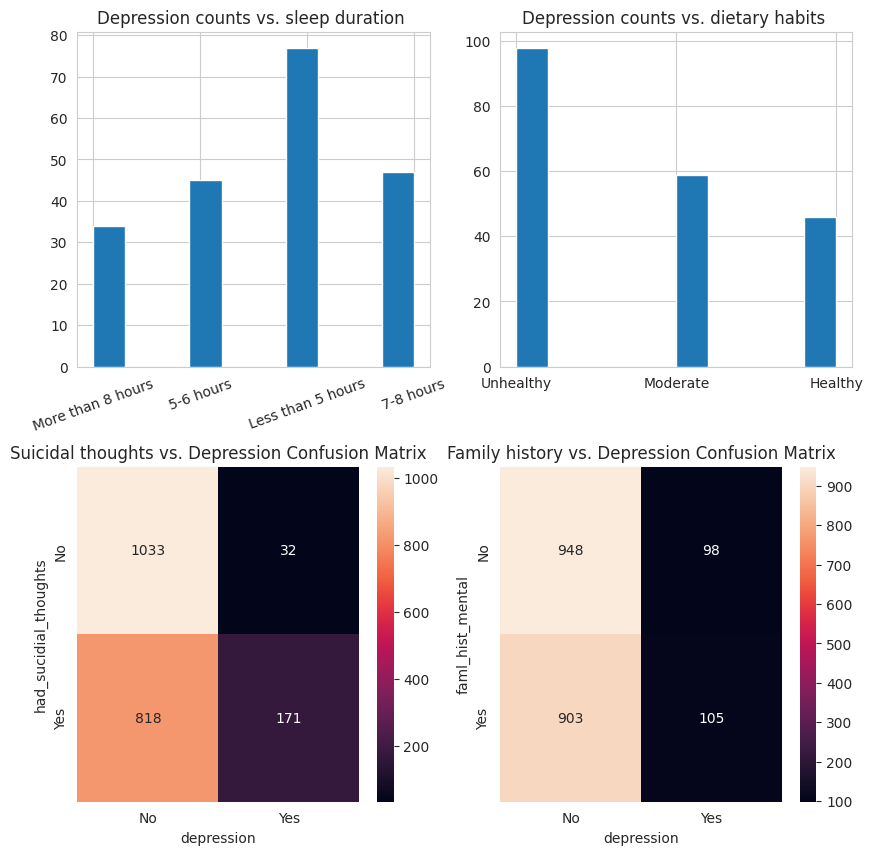

In [6]:
from sklearn.metrics import confusion_matrix # For visualization of two categorical binary data

fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2,2, figsize=(10,10))
fig.subplots_adjust(hspace=0.3)

ax1.hist(x=data.loc[data['depression'] == "Yes"]['sleep_duration'])
ax1.tick_params(axis='x', rotation=20)
ax1.set_title("Depression counts vs. sleep duration ")

ax2.hist(x=data.loc[data['depression'] == "Yes"]['dietary_habits'])
ax2.set_title("Depression counts vs. dietary habits ")

sucidl_thght = (data["had_sucidial_thoughts"] == "Yes").astype(int)
faml_hist_mental = (data["faml_hist_mental"] == "Yes").astype(int)
depression = (data["depression"] == "Yes").astype(int)

scdl_viz_conf_matrix = confusion_matrix(sucidl_thght, depression)
sns.heatmap(scdl_viz_conf_matrix, annot=True, fmt="d", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], ax=ax3)
ax3.set_ylabel("had_sucidial_thoughts")
ax3.set_xlabel("depression")
ax3.set_title("Suicidal thoughts vs. Depression Confusion Matrix")

faml_viz_conf_matrix = confusion_matrix(faml_hist_mental, depression)
sns.heatmap(faml_viz_conf_matrix, annot=True, fmt="d", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], ax=ax4)
ax4.set_ylabel("faml_hist_mental")
ax4.set_xlabel("depression")
ax4.set_title("Family history vs. Depression Confusion Matrix")

Text(0.5, 1.0, 'Depression nears zero as \n work pressure and job satisfaction go down')

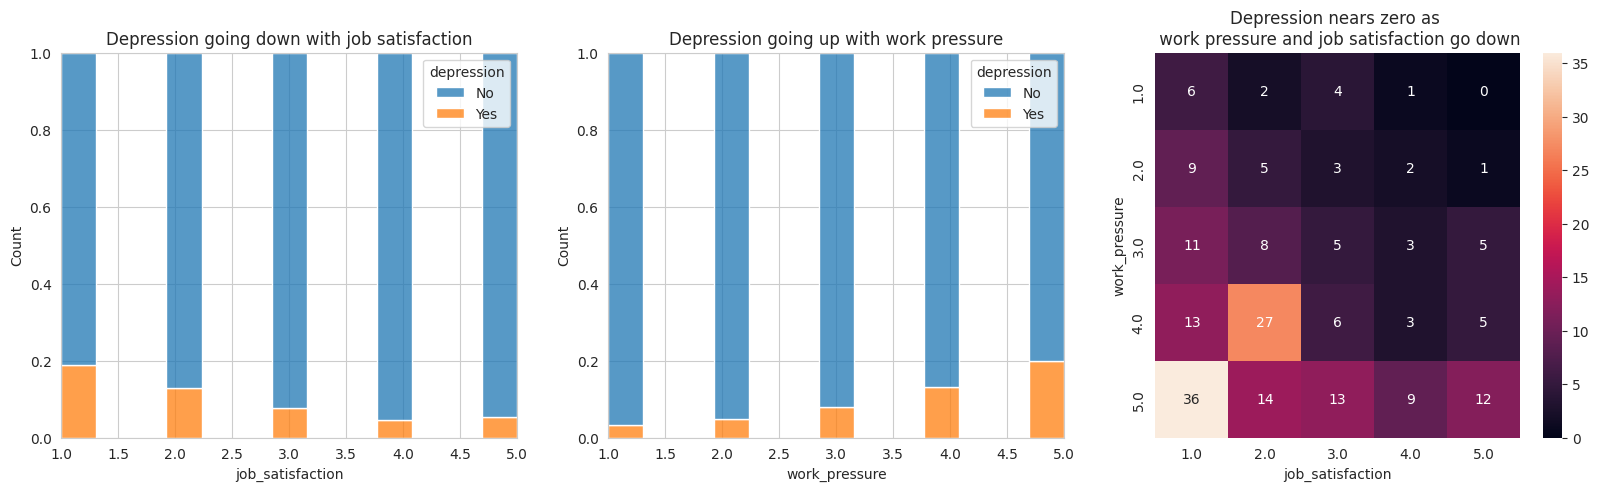

In [7]:
fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(20,5))

sns.histplot(data, x="job_satisfaction", hue="depression", multiple="fill", ax=ax1)
ax1.set_title("Depression going down with job satisfaction")

sns.histplot(data, x="work_pressure", hue="depression", multiple="fill", ax=ax2)
ax2.set_title("Depression going up with work pressure")

crosstab = pd.crosstab(
    data[data['depression'] == 'Yes']['work_pressure'],
    data[data['depression'] == 'Yes']['job_satisfaction']
)
sns.heatmap(crosstab, annot=True, ax=ax3)
ax3.set_title("Depression nears zero as \n work pressure and job satisfaction go down")

# Findings


1. **Age & Depression**
  - Depression cases are highest in the 20-30 age group and steadily decrease with age
  - Older populations (50-60) show significantly lower depression rates
  - The trend suggests younger adults are more vulnerable to mental health challenges

2. **Sleep Patterns & Depression**
  - People sleeping less than 5 hours show the highest depression counts (around 75 cases)
  - Optimal sleep (7-8 hours) shows lower depression rates (around 45 cases)
  - The relationship suggests sleep duration is a crucial factor in mental health

3. **Dietary Habits & Depression**
  - Unhealthy dietary habits strongly correlate with depression (nearly 100 cases)
  - Healthy eating habits show the lowest depression rates (about 45 cases)
  - Clear progression from healthy to unhealthy diet showing increasing depression risk

4. **Job Satisfaction & Depression**
  - Higher job satisfaction (4.5-5.0) shows minimal depression cases
  - Lower satisfaction levels (1.0-2.0) correlate with significantly higher depression rates
  - The relationship suggests job satisfaction is a key protective factor against depression

5. **Work Pressure & Depression**
  - Higher work pressure (4.0-5.0) correlates with increased depression cases
  - Lower pressure levels show fewer depression cases
  - The relationship indicates work pressure as a significant risk factor

6. **Family History & Depression**
  - 105 cases show depression with family history versus 98 without
  - Family history appears to have a moderate influence on depression risk
  - Suggests genetic or environmental family factors play a role in depression

7. **Suicidal Thoughts & Depression**
  - 171 cases show both depression and suicidal thoughts
  - Strong correlation between depression diagnosis and suicidal ideation
  - Highlights the critical relationship between deprek

### Summary of Critical Findings
The data reveals that depression is most strongly influenced by job-related factors (satisfaction and pressure), lifestyle choices (sleep and diet), and age. Family history shows a moderate influence, while the strong correlation with suicidal thoughts emphasizes the importance of early intervention and treatment.

# Data Preparation

In [8]:
# Converting categorical columns with Yes/No values to 1/0

print(data['had_sucidial_thoughts'].unique()) # Making sure only Yes/No values exists
print(data['faml_hist_mental'].unique())
print(data['depression'].unique())

def convert_yes_no_to_int(col):
    return (col == "Yes").astype(int)

data['had_sucidial_thoughts'] = convert_yes_no_to_int(data['had_sucidial_thoughts'])
data['faml_hist_mental'] = convert_yes_no_to_int(data["faml_hist_mental"])
data['depression'] = convert_yes_no_to_int(data["depression"])

data

['No' 'Yes']
['No' 'Yes']
['No' 'Yes']


,gender,age,work_pressure,job_satisfaction,sleep_duration,dietary_habits,had_sucidial_thoughts,work_hours,financial_stress,faml_hist_mental,depression
0,Female,37,2.0,4.0,7-8 hours,Moderate,0,6,2,0,0
1,Male,60,4.0,3.0,5-6 hours,Unhealthy,1,0,4,1,0
2,Female,42,2.0,3.0,5-6 hours,Moderate,0,0,2,0,0
3,Female,44,3.0,5.0,7-8 hours,Healthy,1,1,2,1,0
4,Male,48,4.0,3.0,7-8 hours,Moderate,1,6,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2049,Female,45,1.0,3.0,Less than 5 hours,Healthy,1,2,5,1,0
2050,Male,25,1.0,5.0,5-6 hours,Healthy,1,12,3,1,0
2051,Female,23,3.0,1.0,Less than 5 hours,Moderate,1,8,3,0,1
2052,Female,24,1.0,4.0,Less than 5 hours,Moderate,1,4,4,0,0


In [9]:
# Converting gender to is_male column
data['is_male'] = (data['gender'] == "Male").astype(int)
data = data.drop("gender", axis=1)

data[:3]

,age,work_pressure,job_satisfaction,sleep_duration,dietary_habits,had_sucidial_thoughts,work_hours,financial_stress,faml_hist_mental,depression,is_male
0,37,2.0,4.0,7-8 hours,Moderate,0,6,2,0,0,0
1,60,4.0,3.0,5-6 hours,Unhealthy,1,0,4,1,0,1
2,42,2.0,3.0,5-6 hours,Moderate,0,0,2,0,0,0


# One hot encoding numerical range columns
Some columns, although numerical at first glance, are a range of value from a to b.

In [10]:
print(data['work_pressure'].unique())
print(data['job_satisfaction'].unique())
print(data['financial_stress'].unique())

# ALL UNIQUE VALUES ARE FROM 1 TO 5 IN THIS CASE

[2. 4. 3. 1. 5.]
[4. 3. 5. 2. 1.]
[2 4 5 3 1]


In [11]:
job_satisfaction_dummies = pd.get_dummies(data["job_satisfaction"].astype(int), prefix="job_satisfaction", drop_first=True).astype(int)
financial_stress_dummies = pd.get_dummies(data["financial_stress"].astype(int), prefix="financial_stress", drop_first=True).astype(int)
work_pressure_dummies = pd.get_dummies(data["work_pressure"].astype(int), prefix="work_pressure", drop_first=True).astype(int)

work_pressure_dummies.head()

,work_pressure_2,work_pressure_3,work_pressure_4,work_pressure_5
0,1,0,0,0
1,0,0,1,0
2,1,0,0,0
3,0,1,0,0
4,0,0,1,0


In [12]:
# Dropping original columns and joining one hot encoded values
data = data.drop(["job_satisfaction","financial_stress","work_pressure"], axis=1)
data = data.join([job_satisfaction_dummies,financial_stress_dummies,work_pressure_dummies])

data

,age,sleep_duration,dietary_habits,had_sucidial_thoughts,work_hours,faml_hist_mental,depression,is_male,job_satisfaction_2,job_satisfaction_3,job_satisfaction_4,job_satisfaction_5,financial_stress_2,financial_stress_3,financial_stress_4,financial_stress_5,work_pressure_2,work_pressure_3,work_pressure_4,work_pressure_5
0,37,7-8 hours,Moderate,0,6,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
1,60,5-6 hours,Unhealthy,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0
2,42,5-6 hours,Moderate,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
3,44,7-8 hours,Healthy,1,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0
4,48,7-8 hours,Moderate,1,6,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049,45,Less than 5 hours,Healthy,1,2,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2050,25,5-6 hours,Healthy,1,12,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2051,23,Less than 5 hours,Moderate,1,8,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
2052,24,Less than 5 hours,Moderate,1,4,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


# One hot encoding remaining categorical columns

In [13]:
print(data["dietary_habits"].unique())
print(data["sleep_duration"].unique())

['Moderate' 'Unhealthy' 'Healthy']
['7-8 hours' '5-6 hours' 'More than 8 hours' 'Less than 5 hours']


In [14]:
sleep_duration_dummies = pd.get_dummies(data["sleep_duration"], prefix="sleep_duration", drop_first=True).astype(int)
dietary_habits_dummies = pd.get_dummies(data["dietary_habits"], prefix="dietary_habits", drop_first=True).astype(int)

dietary_habits_dummies.head()

,dietary_habits_Moderate,dietary_habits_Unhealthy
0,1,0
1,0,1
2,1,0
3,0,0
4,1,0


In [15]:
data = data.drop(["sleep_duration","dietary_habits"], axis=1)
data = data.join([sleep_duration_dummies, dietary_habits_dummies])

data

,age,had_sucidial_thoughts,work_hours,faml_hist_mental,depression,is_male,job_satisfaction_2,job_satisfaction_3,job_satisfaction_4,job_satisfaction_5,...,financial_stress_5,work_pressure_2,work_pressure_3,work_pressure_4,work_pressure_5,sleep_duration_7-8 hours,sleep_duration_Less than 5 hours,sleep_duration_More than 8 hours,dietary_habits_Moderate,dietary_habits_Unhealthy
0,37,0,6,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,60,1,0,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,42,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,44,1,1,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
4,48,1,6,1,0,1,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049,45,1,2,1,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
2050,25,1,12,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2051,23,1,8,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2052,24,1,4,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [16]:
y = data['depression']
X = data.drop('depression', axis=1)

In [17]:
# Splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neural_network import MLPClassifier

In [19]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

# Evaluating
error_dfs = []
def train_and_generate_error(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    error_df = pd.DataFrame([], columns=["Error Name","Error Value","Error Range"])
    
    def generate_error_row(error_name: str, err_val: float, range: str):
        error_df.loc[len(error_df)] = [error_name, err_val, range]
    
    generate_error_row("Accuracy", acc, "[0, 1]")
    generate_error_row("Precision", precision, "[0, 1]")
    generate_error_row("F1 score", f1, "[0, 1]")
    generate_error_row("Recall", recall, "[0, 1]")

    error_dfs.append(error_df)


In [20]:
train_and_generate_error(LogisticRegression(max_iter=500))
train_and_generate_error(SVC(class_weight='balanced'))
train_and_generate_error(DecisionTreeClassifier())
train_and_generate_error(MLPClassifier(max_iter=500))

<Axes: >

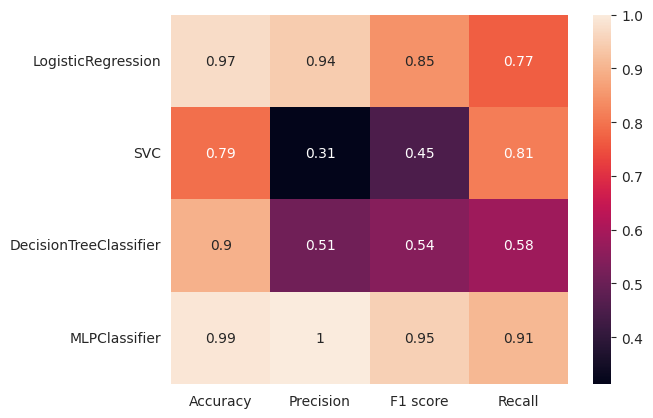

In [21]:
# Heatmapping errors on different models
model_names = ["LogisticRegression", "SVC", "DecisionTreeClassifier", "MLPClassifier"]
error_values = {model_names[i] : list(map(lambda err: err[1], mdl.values)) for i, mdl in enumerate(error_dfs)}

model_error_df = pd.DataFrame(error_values, index=["Accuracy","Precision","F1 score","Recall"]).T
sns.heatmap(model_error_df, annot=True)

# Model Performance Analysis


1. **MLPClassifier (Neural Network)**
  - Best overall performer with highest scores across all metrics
  - Perfect precision (1.0) and excellent accuracy (0.99)
  - Strong recall (0.88) and F1 score (0.94)

2. **LogisticRegression**
  - Second-best performer with consistently high scores
  - Excellent accuracy (0.97) and precision (0.94)
  - Good recall (0.77) and F1 score (0.85)

3. **DecisionTreeClassifier**
  - Moderate performance across most metrics
  - Good accuracy (0.90) but lower precision (0.52)
  - Consistent but moderate F1 score (0.55) and recall (0.58)

4. **SVC (Support Vector Classification)**
  - Most variable performance across metrics
  - Good accuracy (0.79) and recall (0.81)
  - Poor precision (0.31) affecting accuracy are priorities.

# Conclusion
The MLPClassifier emerges as the most effective model for depression prediction, showing superior performance across all metrics. LogisticRegression provides a strong alternative with more consistent, though slightly lower, performance. The DecisionTreeClassifier and SVC show limitations in precision and overall effectiveness, making them less suitable for this particular classification task. For deployment, the MLPClassifier would be the recommended choice, especially when precision and accuracy are priorities.